In [1]:
import wandb
import json
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
from utils import _scale_params, load_config

In [2]:
api = wandb.Api()
api.entity = "teresapelinski"
# faab_autoencoder_transformer/frraprup -- transformer
# faab_autoencoder_transformer_time/ehdzqdop -- transformer time

project = api.project("teresapelinski/faab_autoencoder_transformer_time_jan_best")

# sweeps = [api.sweep(f'teresapelinski/faab_autoencoder_transformer_time_jan_best/{sweep}') for sweep in sweep_ids]

# _path = "../../models/trained/transformer-autoencoder-timecomp-jan"


In [5]:

from wandb.apis.public import Api

# Get runs matching filters
runs = Api().runs(
    path="teresapelinski/faab_autoencoder_transformer_time_jan_best", filters={"state": "finished"}
)


In [6]:
selected_runs = []
for run in runs:
    loss = run.summary.get("train_loss")
    if loss < 0.0120:
        selected_runs.append(run)

In [7]:
len(selected_runs)

23

In [5]:
# finished_runs = []

# # Iterate over runs in the sweep
# for run in sweep.runs:
#     # Fetch the run to get detailed information, including its state
#     detailed_run = wandb.Api().run(f"{run.project}/{run.id}")
#     # Check if the run is finished
#     if detailed_run.state == "finished":
#         finished_runs.append(detailed_run)


In [6]:
# import os

# #load api key from .env
# with open("../.env") as f:
#     for line in f:
#         if line.strip() and not line.startswith('#'):
#             key, value = line.strip().split('=', 1)
#             os.environ[key] = value


In [7]:
# wandb.login(key=os.environ["WANDB_API_KEY"])

In [8]:
_path = "../../models/trained/transformer-autoencoder-timecomp-jan"

id_ep = {}
run_ids = []
for run in selected_runs:
    files = [file.name for file in run.files()]
    matching_files = [file for file in files if file.endswith(".model")]
    epochs = [int(file.split("_")[-1].split(".model")[0]) for file in matching_files]
    if epochs == []:
        continue
    highest_epoch = max(epochs)
    id_ep[run.id] = highest_epoch
    run_ids.append(run.id)
    print(run.id, highest_epoch)    
    root_file_name = f'transformer_run_{run.id}_{highest_epoch}'
    run.file(f'{root_file_name}.model').download(root=_path, exist_ok=True)
    json.dump(run.config, open(f'{_path}/{root_file_name}.json', "w"))
    json.dump({"train_loss": run.summary["train_loss"]}, open(f'{_path}/{root_file_name}_metrics.json', "w"))

json.dump(run_ids, open(f'{_path}/run_ids.json', "w"))

8j4cqfd8 150
sys6hs5g 150
hkk0f6fj 150
u5iahdhq 150
qhflv5i7 150
qyj57j1b 150
86cghvt4 150
5w88invs 150
7uyh2p4e 150
vvo8h1xi 150
mwjhvzcu 150
mlr68eqr 150
z828i1oa 150
nb3t97bj 150
hcser4eq 150
tcw0uexa 150
7dy9m719 150
tzib2w31 150
7j7i8ps5 150
5qzxo7z5 150
2vfestph 150
wxlaij3l 150
6e5xcpwn 150


In [9]:
json.dump(id_ep, open(f'{_path}/id_ep.json', "w"))

In [10]:
_train_losses = {}
for _id in run_ids:
    _train_losses[_id] = json.load(open(f'{_path}/transformer_run_{_id}_{id_ep[_id]}_metrics.json'))["train_loss"]

models_ordered_by_asc_loss = list(dict(sorted(_train_losses.items(), key=lambda item: item[1])).keys())
filename = _path + "/models_ordered_by_asc_loss.json"

with open(filename, 'w') as file:
    json.dump(models_ordered_by_asc_loss, file)

In [11]:
scaled_model_coordinates = _scale_params(epochs=id_ep, path = _path)

filename = _path + "/scaled_params.json"
with open (filename, 'w') as file:
    json.dump(scaled_model_coordinates, file)

In [12]:
all_configs = {}
for run in run_ids:
    config = load_config(run, epochs=id_ep[run],path=_path)
    all_configs[run] = config
    
    

In [13]:
all_configs

{'8j4cqfd8': {'mask': False,
  'pred': False,
  'model': 'transformer',
  'device': 'cuda:0',
  'epochs': 150,
  'dropout': 0.17842632989423046,
  'project': 'faab_autoencoder_transformer',
  'seq_len': 1024,
  'feat_len': 8,
  'criterion': 'weighted_mse',
  'num_heads': 2,
  'optimizer': 'rmsprop',
  'batch_size': 64,
  'num_layers': 1,
  'pickle_path': 'src/dataset/data/0117/0117_processed_1024.pkl',
  'comp_seq_len': 128,
  'ff_size_time': 1024,
  'weights_path': 'src/dataset/data/0117/weights.pkl',
  'comp_feat_len': 4,
  'learning_rate': 0.0004326447935396546,
  'max_grad_norm': 0,
  'pe_scale_factor': 1,
  'plotter_samples': 5,
  'scheduler_gamma': 0.1,
  'ff_size_features': 8,
  'num_encoder_layers': 7,
  'scheduler_step_size': 0},
 'sys6hs5g': {'mask': False,
  'pred': False,
  'model': 'transformer',
  'device': 'cuda:0',
  'epochs': 150,
  'dropout': 0.1862820635724552,
  'project': 'faab_autoencoder_transformer',
  'seq_len': 1024,
  'feat_len': 8,
  'criterion': 'weighted_m

In [14]:
scaled_model_coordinates

{'8j4cqfd8': [0.0, 0.5, 0.0, 0.4326447935396546],
 'sys6hs5g': [0.0, 0.5, 0.0, 0.2320145908013096],
 'hkk0f6fj': [0.0, 1.0, 0.14285714285714285, 0.16053254510185178],
 'u5iahdhq': [0.2, 0.5, 0.2857142857142857, 0.18588709874827214],
 'qhflv5i7': [0.8, 1.0, 0.14285714285714285, 0.22007308835992542],
 'qyj57j1b': [0.4, 1.0, 0.0, 0.39385132872733153],
 '86cghvt4': [0.6, 1.0, 0.14285714285714285, 0.21026274459513516],
 '5w88invs': [0.2, 0.5, 0.14285714285714285, 0.09339259222672824],
 '7uyh2p4e': [0.6, 0.0, 0.0, 0.12174667195980615],
 'vvo8h1xi': [0.8, 0.0, 0.0, 0.3489182928701692],
 'mwjhvzcu': [0.6, 0.5, 0.0, 0.3168983240338473],
 'mlr68eqr': [0.6, 1.0, 0.0, 0.2137060074455579],
 'z828i1oa': [0.2, 0.5, 0.2857142857142857, 0.4425422953784996],
 'nb3t97bj': [0.8, 1.0, 0.0, 0.1864412142677779],
 'hcser4eq': [0.8, 0.0, 0.0, 0.24916687556316883],
 'tcw0uexa': [0.4, 0.5, 0.14285714285714285, 0.06552383074718193],
 '7dy9m719': [0.2, 0.0, 0.0, 0.2919682702066215],
 'tzib2w31': [0.0, 0.5, 0.14285

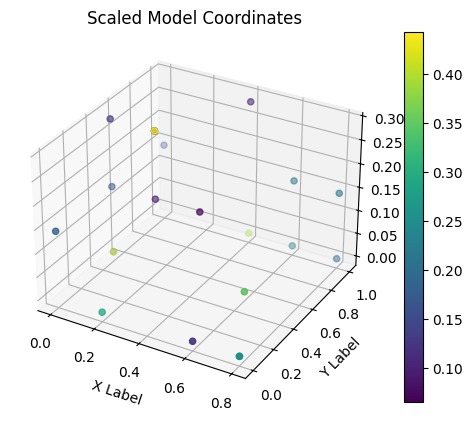

In [15]:
# plot scaled_model_coordinates. it's 4D, so you can use a 3D scatter plot with color coding for the epochs or train loss.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = [coord[0] for coord in scaled_model_coordinates.values()]
y = [coord[1] for coord in scaled_model_coordinates.values()]
z = [coord[2] for coord in scaled_model_coordinates.values()]
c = [coord[3] for coord in scaled_model_coordinates.values()]

sc = ax.scatter(x, y, z, c=c, cmap='viridis')

plt.colorbar(sc)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Scaled Model Coordinates')
plt.show()